In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from __future__ import absolute_import, division, print_function

import pathlib
from collections import OrderedDict

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from time import time
from tensorflow.python.keras.callbacks import TensorBoard


In [3]:
raw_dataset = pd.read_csv("./Datasets/Vehicles/vehicles_edit.csv")



In [4]:
dataset = raw_dataset.copy()
dataset.head()




,id,year,make,model,cylinders,displ,drive,trany,co2TailpipeGpm,city08,comb08,highway08,fuelType,VClass
0,36934,2016,smart,fortwo coupe,3,0.9,RWD,Auto,246.0,33,35,39,Premium Gasoline,Two Seaters
1,36935,2016,smart,fortwo coupe,3,0.9,RWD,Manual,255.0,31,34,39,Premium Gasoline,Two Seaters
2,37873,2017,smart,fortwo cabriolet,3,0.9,RWD,Auto,251.0,33,35,38,Premium Gasoline,Two Seaters
3,37874,2017,smart,fortwo cabriolet,3,0.9,RWD,Manual,258.0,31,34,38,Premium Gasoline,Two Seaters
4,38461,2017,smart,fortwo coupe,3,0.9,RWD,Auto,248.0,33,35,39,Premium Gasoline,Two Seaters


In [5]:
dataset.isna().sum()



id                0
year              0
make              0
model             0
cylinders         0
displ             0
drive             0
trany             0
co2TailpipeGpm    0
city08            0
comb08            0
highway08         0
fuelType          0
VClass            0
dtype: int64

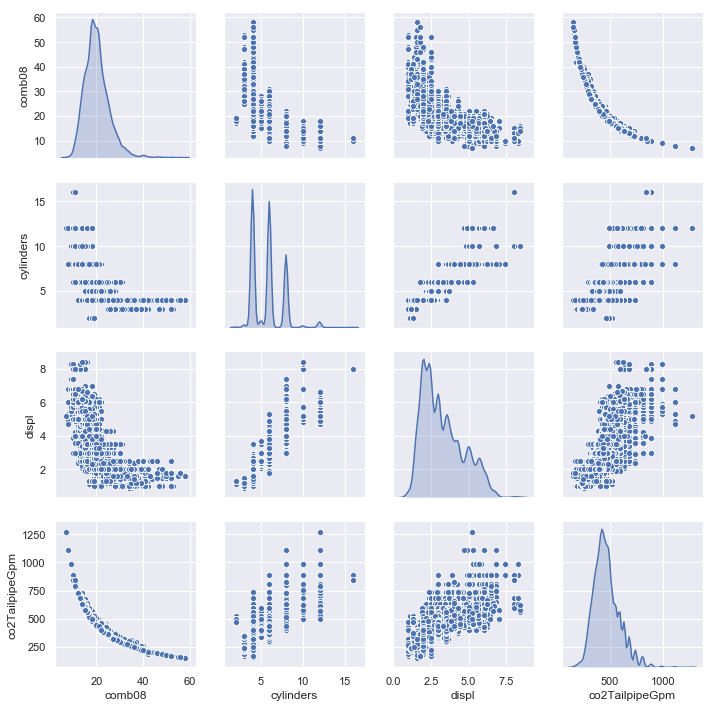

In [6]:
sns.set()
sns.pairplot(dataset,vars=["comb08","cylinders","displ","co2TailpipeGpm"], diag_kind="kde")


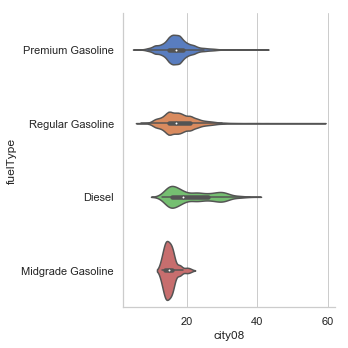

In [7]:
sns.set(style="whitegrid")
g = sns.catplot(x="city08", y="fuelType", data=dataset,
                kind="violin", palette="muted")


In [9]:
dataset = dataset.drop(columns=['id','year','make','model','city08','highway08','VClass'])
dataset.head()
dataset.tail()

,cylinders,displ,drive,trany,co2TailpipeGpm,comb08,fuelType
0,3,0.9,RWD,Auto,246.0,35,Premium Gasoline
1,3,0.9,RWD,Manual,255.0,34,Premium Gasoline
2,3,0.9,RWD,Auto,251.0,35,Premium Gasoline
3,3,0.9,RWD,Manual,258.0,34,Premium Gasoline
4,3,0.9,RWD,Auto,248.0,35,Premium Gasoline


,cylinders,displ,drive,trany,co2TailpipeGpm,comb08,fuelType
38003,8,6.2,RWD,Auto,634.785714,14,Premium Gasoline
38004,4,2.0,AWD,Auto,385.000000,23,Premium Gasoline
38005,4,2.0,AWD,Auto,385.000000,23,Premium Gasoline
38006,4,1.6,AWD,Auto,324.000000,27,Regular Gasoline
38007,4,2.0,AWD,Auto,399.000000,22,Regular Gasoline


## Change catagorical data to one-hot
### Fuel type

In [10]:
fuel_type = dataset.pop("fuelType")
dataset['Diesel'] = (fuel_type == "Diesel")*1.0
dataset['Regular Gasoline'] = (fuel_type == "Regular Gasoline")*1.0
dataset['Midgrade Gasoline'] = (fuel_type == "Midgrade Gasoline")*1.0
dataset['Premium Gasoline'] = (fuel_type == "Premium Gasoline")*1.0
dataset.tail()

,cylinders,displ,drive,trany,co2TailpipeGpm,comb08,Diesel,Regular Gasoline,Midgrade Gasoline,Premium Gasoline
38003,8,6.2,RWD,Auto,634.785714,14,0.0,0.0,0.0,1.0
38004,4,2.0,AWD,Auto,385.000000,23,0.0,0.0,0.0,1.0
38005,4,2.0,AWD,Auto,385.000000,23,0.0,0.0,0.0,1.0
38006,4,1.6,AWD,Auto,324.000000,27,0.0,1.0,0.0,0.0
38007,4,2.0,AWD,Auto,399.000000,22,0.0,1.0,0.0,0.0


### Transmission

In [11]:
transmission = dataset.pop("trany")
dataset['Auto'] = (transmission == "Auto")*1.0
dataset['Manual'] = (transmission == "Manual")*1.0
dataset.tail()

,cylinders,displ,drive,co2TailpipeGpm,comb08,Diesel,Regular Gasoline,Midgrade Gasoline,Premium Gasoline,Auto,Manual
38003,8,6.2,RWD,634.785714,14,0.0,0.0,0.0,1.0,1.0,0.0
38004,4,2.0,AWD,385.000000,23,0.0,0.0,0.0,1.0,1.0,0.0
38005,4,2.0,AWD,385.000000,23,0.0,0.0,0.0,1.0,1.0,0.0
38006,4,1.6,AWD,324.000000,27,0.0,1.0,0.0,0.0,1.0,0.0
38007,4,2.0,AWD,399.000000,22,0.0,1.0,0.0,0.0,1.0,0.0


### Drive axle type

In [12]:
drive = dataset.pop("drive")
dataset['FWD'] = (drive == "FWD")*1.0
dataset['RWD'] = (drive == "RWD")*1.0
dataset['AWD'] = (drive == "AWD")*1.0
dataset.tail()

,cylinders,displ,co2TailpipeGpm,comb08,Diesel,Regular Gasoline,Midgrade Gasoline,Premium Gasoline,Auto,Manual,FWD,RWD,AWD
38003,8,6.2,634.785714,14,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
38004,4,2.0,385.000000,23,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
38005,4,2.0,385.000000,23,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
38006,4,1.6,324.000000,27,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
38007,4,2.0,399.000000,22,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [13]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)



In [14]:
train_stats = train_dataset.describe()
train_stats.pop("comb08")
train_stats = train_stats.transpose()
train_stats



count    30406.000000
mean        20.212754
std          5.181681
min          7.000000
25%         17.000000
50%         20.000000
75%         23.000000
max         58.000000
Name: comb08, dtype: float64

,count,mean,std,min,25%,50%,75%,max
cylinders,30406.0,5.701441,1.744922,2.0,4.000000,6.00,6.000000,16.000000
displ,30406.0,3.277731,1.340666,0.9,2.200000,3.00,4.200000,8.400000
co2TailpipeGpm,30406.0,469.274336,118.524115,154.0,386.391304,444.35,522.764706,1269.571429
Diesel,30406.0,0.026442,0.160449,0.0,0.000000,0.00,0.000000,1.000000
Regular Gasoline,30406.0,0.665790,0.471721,0.0,0.000000,1.00,1.000000,1.000000
Midgrade Gasoline,30406.0,0.002927,0.054024,0.0,0.000000,0.00,0.000000,1.000000
Premium Gasoline,30406.0,0.304841,0.460348,0.0,0.000000,0.00,1.000000,1.000000
Auto,30406.0,0.677827,0.467317,0.0,0.000000,1.00,1.000000,1.000000
Manual,30406.0,0.322173,0.467317,0.0,0.000000,0.00,1.000000,1.000000
FWD,30406.0,0.358975,0.479708,0.0,0.000000,0.00,1.000000,1.000000


In [15]:
train_labels = train_dataset.pop('comb08')
test_labels = test_dataset.pop('comb08')



In [16]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)



In [17]:
normed_train_stats = normed_train_data.describe()
normed_train_stats = normed_train_stats.transpose()
normed_train_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,30406.0,-1.979312e-16,1.0,-2.121265,-0.975081,0.171102,0.171102,5.902018
displ,30406.0,-2.715420e-16,1.0,-1.773544,-0.803877,-0.207159,0.687918,3.820689
co2TailpipeGpm,30406.0,-1.224510e-16,1.0,-2.660002,-0.699293,-0.210289,0.451304,6.752188
Diesel,30406.0,-2.442009e-17,1.0,-0.164801,-0.164801,-0.164801,-0.164801,6.067718
Regular Gasoline,30406.0,-8.564557e-17,1.0,-1.411404,-1.411404,0.708491,0.708491,0.708491
Midgrade Gasoline,30406.0,1.168425e-19,1.0,-0.054181,-0.054181,-0.054181,-0.054181,18.456144
Premium Gasoline,30406.0,5.328019e-17,1.0,-0.662198,-0.662198,-0.662198,1.510074,1.510074
Auto,30406.0,-3.388433e-17,1.0,-1.450466,-1.450466,0.689411,0.689411,0.689411
Manual,30406.0,3.388433e-17,1.0,-0.689411,-0.689411,-0.689411,1.450466,1.450466
FWD,30406.0,5.094334e-17,1.0,-0.748321,-0.748321,-0.748321,1.336282,1.336282


In [18]:
def build_model():
  model = keras.Sequential([
    layers.Dense(48, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    layers.Dense(48, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)


  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model



In [19]:
tensorboard = TensorBoard(log_dir="./logs/{}".format(time()))

In [20]:
model = build_model()



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [21]:
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 49        
Total params: 3,025
Trainable params: 3,025
Non-trainable params: 0
_________________________________________________________________


In [22]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result



array([[0.50860834],
       [0.43144697],
       [0.48244196],
       [0.380781  ],
       [0.44767556],
       [0.2735471 ],
       [0.7303735 ],
       [0.7281474 ],
       [0.3632446 ],
       [0.43116978]], dtype=float32)

In [23]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 200

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.3, verbose=0,
  callbacks=[PrintDot(),tensorboard])



Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................

In [24]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()



,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
195,0.041864,0.136999,0.041864,0.108738,0.235410,0.108738,195
196,0.041149,0.136515,0.041149,0.107256,0.256321,0.107256,196
197,0.041682,0.135337,0.041683,0.055024,0.156623,0.055024,197
198,0.041625,0.136823,0.041625,0.035514,0.105315,0.035514,198
199,0.040803,0.135793,0.040803,0.093304,0.212453,0.093304,199


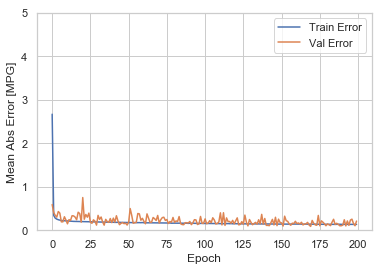

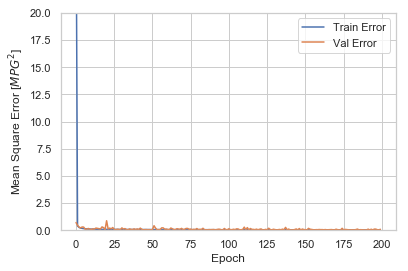

In [25]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)




........................................

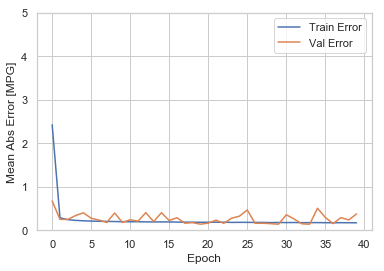

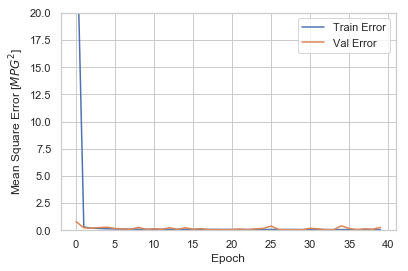

In [26]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)



 # Train result for test set

In [27]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))



Testing set Mean Abs Error:  0.39 MPG


Text(0.5, 0, 'True Values [MPG]')

Text(0, 0.5, 'Predictions [MPG]')

(5.490143369175626, 60.50985663082437, 5.741214805617765, 54.3574251594396)

(5.490143369175626, 60.50985663082437, 5.741214805617765, 60.76092806726651)

(0, 60.50985663082437)

(0, 60.76092806726651)

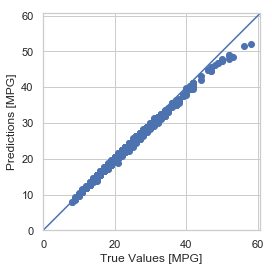

In [28]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        5.000e+00, 6.000e+00, 1.100e+01, 2.300e+01, 4.900e+01, 1.770e+02,
        3.450e+02, 1.108e+03, 1.767e+03, 1.855e+03, 2.029e+03, 1.840e+02,
        3.700e+01]),
 array([-5.86619949, -5.60341331, -5.34062714, -5.07784096, -4.81505478,
        -4.5522686 , -4.28948242, -4.02669624, -3.76391006, -3.50112389,
        -3.23833771, -2.97555153, -2.71276535, -2.44997917, -2.18719299,
        -1.92440681, -1.66162064, -1.39883446, -1.13604828, -0.8732621 ,
        -0.61047592, -0.34768974, -0.08490356,  0.17788261,  0.44066879,
         0.70345497]),
 <a list of 25 Patch objects>)

Text(0.5, 0, 'Prediction Error [MPG]')

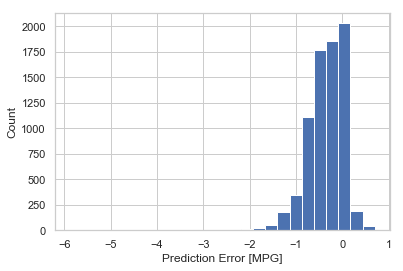

In [29]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

